In [46]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot

In [2]:
warnings.filterwarnings('ignore')

In [3]:
nba_raw=pd.read_csv('nba.csv')

In [5]:
nba_raw.head(3)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN


In [7]:
nba_raw.shape

(458, 9)

### 체질량지수 BMI=kg/(m)^2

In [9]:
nba=nba_raw.dropna(subset=['Height', 'Weight'])
nba.shape

(457, 9)

getting height in meter

In [20]:
splited_height=nba['Height'].str.split('-')
height_inch=splited_height.str[0].astype(int)*12+splited_height.str[1].astype(int)
height_m=height_inch*2.54/100
height_m

0      1.8796
1      1.9812
2      1.9558
3      1.9558
4      2.0828
        ...  
452    2.0828
453    1.9050
454    1.8542
455    2.2098
456    2.1336
Name: Height, Length: 457, dtype: float64

getting weight in kg

In [22]:
weight_kg=nba['Weight']/2.204623
weight_kg

0       81.646613
1      106.594189
2       92.986420
3       83.914574
4      104.779819
          ...    
452    106.140596
453     92.079235
454     81.193020
455    116.119627
456    104.779819
Name: Weight, Length: 457, dtype: float64

In [26]:
bmi=weight_kg/(height_m*height_m)
bmi

0      23.110391
1      27.156693
2      24.309199
3      21.937570
4      24.153635
         ...    
452    24.467319
453    25.372996
454    23.615957
455    23.779334
456    23.017155
Length: 457, dtype: float64

In [27]:
nba.insert(7, 'BMI', bmi)

In [28]:
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,BMI,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,23.110391,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,27.156693,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,24.309199,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,21.937570,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,24.153635,NaN,5000000.0


Below, I'm going to study the correlation between BMI and Salary and the other correlations. 

In [31]:
nba.dropna(subset=['Salary'], inplace=True)
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,BMI,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,23.110391,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,27.156693,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,21.937570,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,24.153635,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,25.718133,NaN,12000000.0


In [33]:
nba.shape

(446, 10)

Now, we're prepared to study correlation between BMI and Salary and so on

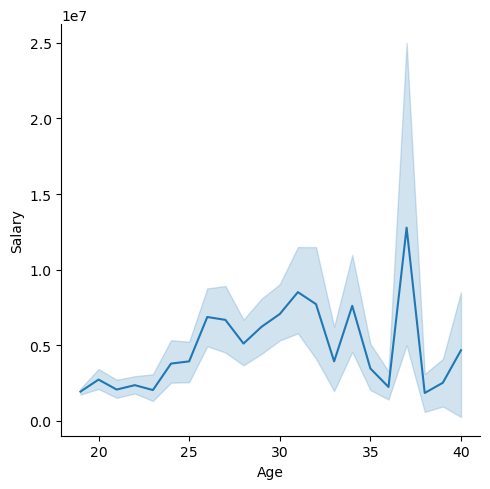

In [36]:
sns.relplot(
    data=nba,
    x='Age',
    y='Salary',
    kind='line'
)

In [37]:
nba.nunique()

Name        446
Team         30
Number       53
Position      5
Age          22
Height       18
Weight       86
BMI         238
College     115
Salary      309
dtype: int64

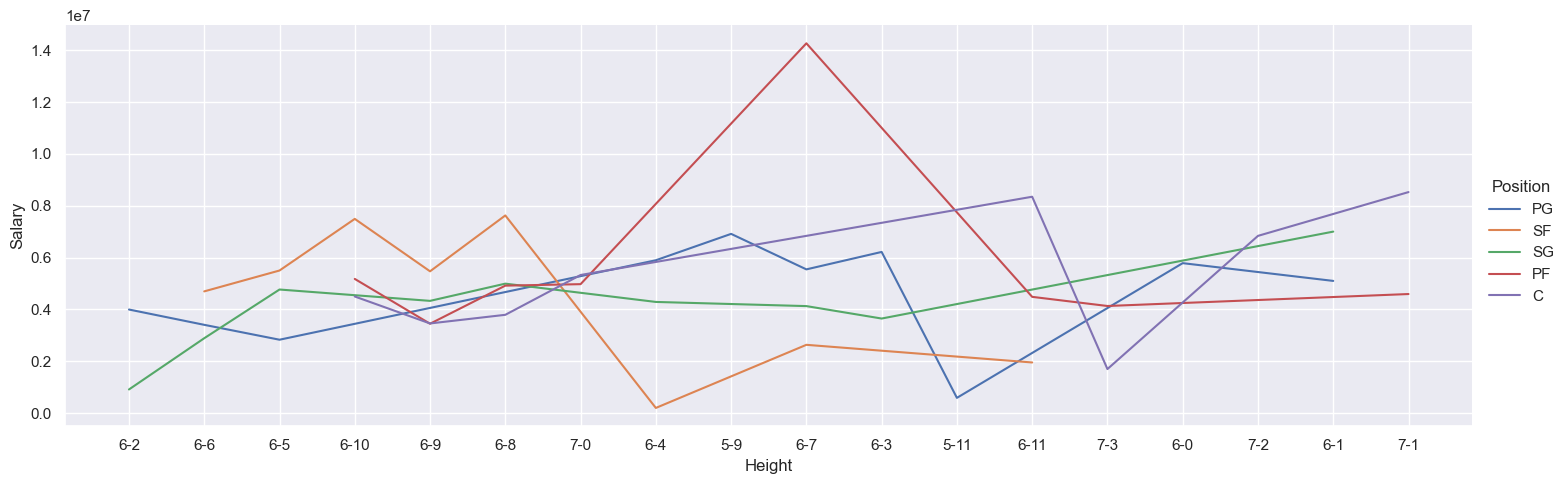

In [48]:
sns.relplot(
    data=nba,
    x='Height',
    y='Salary',
    hue='Position',
    kind='line',
    aspect=3,
    errorbar=None
)